# This Analysis is related to the part-of-speech tags on Articles Lead Paragraphs.

- I am using the same JSON DATA stored in \midterm\data\Archive\jsonData


#### Importing all Libraries used in this Analysis

In [8]:
import requests
import json
import os
import glob
import csv
import matplotlib.pyplot as plt
import re
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter

#### Step 1
- Data Collection from JSON DATA.

In [3]:
# Looped thorugh JSOn file in order to get all lead Paragraph and Appended in list.

relativePath = os.getcwd()
path = relativePath+"/"+'midterm/data/Archive/jsonData'

def getParagraphs(file, lead_paragraph):
    config = json.loads(open(file).read())
    for x in range(len(config['response']['docs'])):
        section = config['response']['docs'][x]['lead_paragraph']
        lead_paragraph.append(section)

    
    

lead_paragraph = []
for directory, subDirectory, filename in os.walk(path):
    for file in filename:
        getParagraphs(os.path.join(directory, file), lead_paragraph)
        
print(len(lead_paragraph))

5206


#### Step 2
- Cleaning Data & Storing in text file stored in midterm/que[1-2]/ana_[1-3]/Part of Speech/leadArticle

In [4]:
# Checking if data processed folder is exist in directory or not.
if os.path.isdir(relativePath+"/"+'midterm/que[1-2]/ana_[1-3]/') == 1:
    if os.path.isdir(relativePath+"/"+'midterm/que[1-2]/ana_[1-3]/Part of Speech/leadArticle') == 0:
        os.makedirs(relativePath+"/"+'midterm/que[1-2]/ana_[1-3]/Part of Speech/leadArticle')

with open(relativePath+"/"+'midterm/que[1-2]/ana_[1-3]/Part of Speech/leadArticle/leadParagraph.txt', "w") as f:
    for para in lead_paragraph:
        if para != None:
            cleanData = re.sub('[^A-Za-z]+', ' ', para)
            f.write(cleanData)
            f.write("\n")

#### Step 3
- Reading that text file to find part of speech in every word.

In [9]:
with open(relativePath+"/"+'midterm/que[1-2]/ana_[1-3]/Part of Speech/leadArticle/leadParagraph.txt') as f:
    data = f.read()

words = word_tokenize(data)
posTag = nltk.pos_tag(words)

speechCount = Counter(tag for word,tag in posTag)
frequency = nltk.FreqDist(speechCount)
topSpeech = frequency.most_common(10)

print(topSpeech)

[('NN', 18450), ('NNP', 15865), ('IN', 13638), ('DT', 11616), ('JJ', 7775), ('NNS', 7252), ('VBD', 3986), ('VB', 3374), ('VBZ', 3334), ('CC', 3285)]


In [10]:
# Assigning explode of 0.1 to plot on pie graph.
i = 0.1
speechList = []

# Looping in order to assign rank to each word.
for explode in range(len(topSpeech)):
    obj1 = topSpeech[explode]
    obj1 = obj1 + (i,)
    speechList.append(obj1)
    i = 0

In [11]:
# Checking if data processed folder is exist in directory or not.
if os.path.isdir(relativePath+"/"+'midterm/que[1-2]/ana_[1-3]/') == 1:
    if os.path.isdir(relativePath+"/"+'midterm/que[1-2]/ana_[1-3]/Part of Speech/result') == 0:
        os.makedirs(relativePath+"/"+'midterm/que[1-2]/ana_[1-3]/Part of Speech/result')

# creating CSV file that contains (Word, Frequency, Rank) sorted by Rank.
fileNameNew = relativePath+"/"+'midterm/que[1-2]/ana_[1-3]/Part of Speech/result/partOfSpeech.csv'

# Writing the data in to CSV file and storing in D drive.
with open(fileNameNew, 'w', newline='') as fp:
    a = csv.writer(fp, delimiter=',')
    a.writerow(["Speech", "Count", "explode"])
    a.writerows(speechList)

#### Step 4
- Creating CSV file and preparing Data for Pie Chart

In [12]:
# Creating DATA for pie chart.
labels = []
sizes = []
explode = []

# Reading CSV file in order to generate loglog figure.
with open(fileNameNew,'r') as csvfile:
    next(csvfile)
    plots = csv.reader(csvfile, delimiter=',')
    for row in plots:
        labels.append(str((row[0])))
        sizes.append(int(row[1]))
        explode.append(float(row[2]))

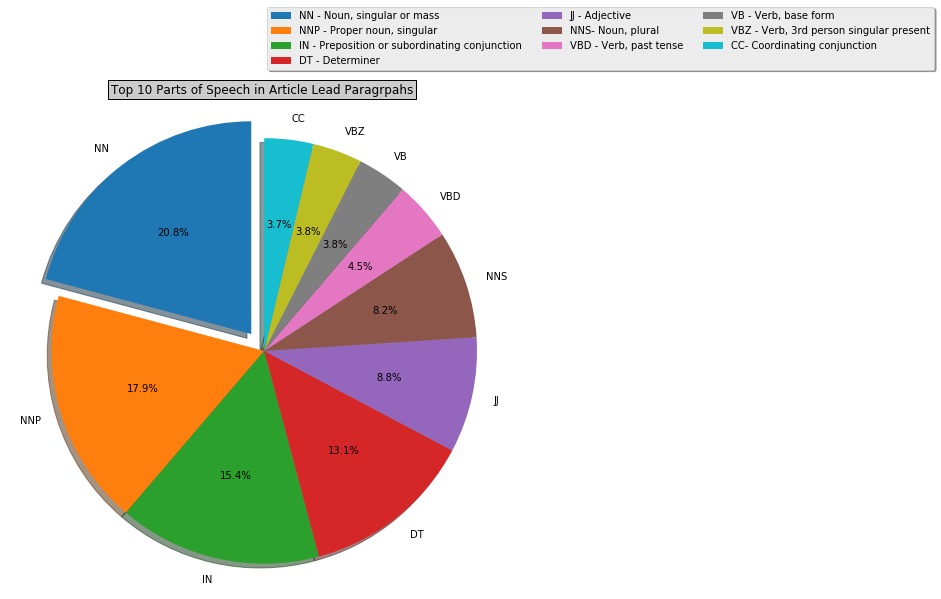

In [13]:
# Plotting PIE CHART

fullForm = ["NN - Noun, singular or mass", "NNP - Proper noun, singular", "IN - Preposition or subordinating conjunction", 
            "DT - Determiner", "JJ - Adjective", "NNS- Noun, plural", "VBD - Verb, past tense", 
            "VB - Verb, base form", "VBZ - Verb, 3rd person singular present", "CC- Coordinating conjunction"]
pieFig = relativePath+"/"+'midterm/que[1-2]/ana_[1-3]/Part of Speech/result/percentSpeech.png'
fig1, ax1 = plt.subplots()
fig = plt.gcf()
fig.set_size_inches(9,9)
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.legend(fullForm, loc="best", bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig(pieFig, bbox_inches='tight')
ax1.set_title('Top 10 Parts of Speech in Article Lead Paragrpahs', 
             bbox={'facecolor':'0.8', 'pad':3})
plt.show()

## Conclusion from Above Analysis (we can predict)

- NYT use majority of NOUN words in all of thier articles.
- Second top majority is Proper Noun & Singular.
- Third majority is Preposition & Subordinating Conjunction.